In [60]:
import numpy as np 
import pandas as pd 
import math
import tensorflow as tf
df = pd.read_csv("E:/fraud-detection/data/creditcard.csv")


In [46]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [47]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [48]:
fraud_ind=df[df.Class==1].index
nofraud_ind=df[df.Class==0].index
fraud_num=len(fraud_ind)
nofraud_num=len(nofraud_ind)
fraud_perc=round(fraud_num/(fraud_num+nofraud_num),5)*100
print("% of fraud of all transactions is ", fraud_perc, "%")

% of fraud of all transactions is  0.173 %


In [49]:
y=df.Class
x=df.drop(['Class','Time','Amount'],axis=1)

In [50]:
# Drop all of the features that have very similar distributions between the two types of transactions.
df_features=df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8','Time','Class'],axis=1)
# Normalize Amount
df_features["Amount"]=(df_features["Amount"]-df_features["Amount"].mean())/df_features["Amount"].std()
# Create train and test datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_features,y,test_size=0.3)

In [51]:
# Linear classifier in tensorflow
nV01 = tf.feature_column.numeric_column('V1')
nV02 = tf.feature_column.numeric_column('V2')
nV03 = tf.feature_column.numeric_column('V3')
nV04 = tf.feature_column.numeric_column('V4')
nV05 = tf.feature_column.numeric_column('V5')
nV06 = tf.feature_column.numeric_column('V6')
nV07 = tf.feature_column.numeric_column('V7')
nV09 = tf.feature_column.numeric_column('V9')
nV10 = tf.feature_column.numeric_column('V10')
nV11 = tf.feature_column.numeric_column('V11')
nV12 = tf.feature_column.numeric_column('V12')
nV14 = tf.feature_column.numeric_column('V14')
nV16 = tf.feature_column.numeric_column('V16')
nV17 = tf.feature_column.numeric_column('V17')
nV18 = tf.feature_column.numeric_column('V18')
nV19 = tf.feature_column.numeric_column('V19')
nV21 = tf.feature_column.numeric_column('V21')
nV22 = tf.feature_column.numeric_column('V22')
nV30 = tf.feature_column.numeric_column('Amount')

features=[nV01,nV02,nV03,nV04,nV05,nV06,nV07,nV09,nV10,nV11,nV12,nV14,nV16,nV17,nV18,nV19,nV21,nV30]

In [69]:
# Tensorflow: Linear Classifier
input_func=tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=100,num_epochs=1000,shuffle=True) 
model=tf.estimator.LinearClassifier(feature_columns=features,n_classes=2)
model.train(input_fn=input_func,steps=10000)
result1=model.evaluate(tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=10, num_epochs=1, shuffle=False))


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\MANISA~1\\AppData\\Local\\Temp\\tmp5p2pvdwj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002019FE65940>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 

INFO:tensorflow:loss = 0.1954432, step = 7101 (0.799 sec)
INFO:tensorflow:global_step/sec: 114.986
INFO:tensorflow:loss = 0.17156684, step = 7201 (0.875 sec)
INFO:tensorflow:global_step/sec: 112.534
INFO:tensorflow:loss = 0.17690164, step = 7301 (0.883 sec)
INFO:tensorflow:global_step/sec: 126.6
INFO:tensorflow:loss = 0.83255196, step = 7401 (0.797 sec)
INFO:tensorflow:global_step/sec: 138.11
INFO:tensorflow:loss = 0.1720853, step = 7501 (0.721 sec)
INFO:tensorflow:global_step/sec: 144.478
INFO:tensorflow:loss = 0.1758926, step = 7601 (0.693 sec)
INFO:tensorflow:global_step/sec: 134.047
INFO:tensorflow:loss = 0.15488529, step = 7701 (0.749 sec)
INFO:tensorflow:global_step/sec: 134.768
INFO:tensorflow:loss = 0.14817545, step = 7801 (0.735 sec)
INFO:tensorflow:global_step/sec: 113.811
INFO:tensorflow:loss = 0.19919932, step = 7901 (0.878 sec)
INFO:tensorflow:global_step/sec: 150.552
INFO:tensorflow:loss = 0.18240109, step = 8001 (0.667 sec)
INFO:tensorflow:global_step/sec: 133.869
INFO:t

In [74]:
print(result1['accuracy'])


0.999047


In [54]:
# Test Linear classification
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=10, num_epochs=1, shuffle=False)
results2=model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-01-23:22:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MANISA~1\AppData\Local\Temp\tmpz7v00kry\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-09-01-23:23:42
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.99947333, accuracy_baseline = 0.9985604, auc = 0.9840646, auc_precision_recall = 0.78030455, average_loss = 0.012920172, global_step = 1000, label/mean = 0.0014395562, loss = 0.12919113, precision = 0.84210527, prediction/mean = 0.01148642, recall = 0.7804878
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\MANISA~1\AppData\Local\Temp\tmpz7v00kry\model.ckpt-1000


In [71]:
print(results2['accuracy'])

0.99947333


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MANISA~1\AppData\Local\Temp\tmpz7v00kry\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


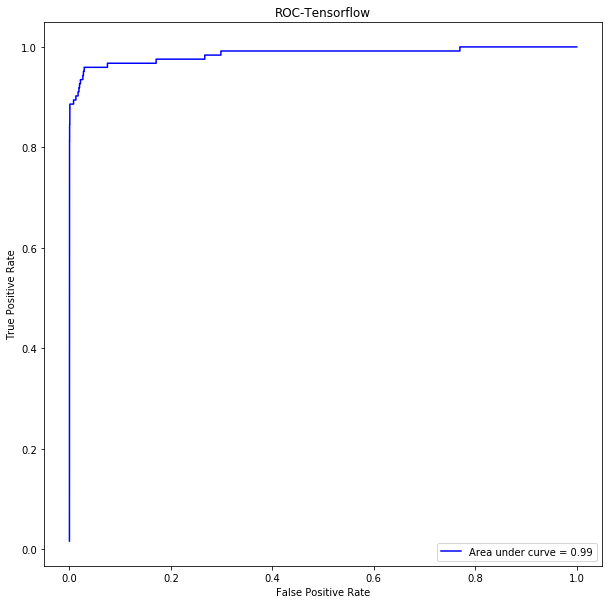

In [56]:
# Prediction:
from sklearn import metrics
pred_input_func= tf.estimator.inputs.pandas_input_fn(x=x_test,batch_size=10,num_epochs=1,shuffle=False)
predictions = model.predict(pred_input_func)

y_pred=[d['logits'] for d in predictions]
fpr,tpr,thresholds=metrics.roc_curve(y_test, y_pred)
roc_auc=metrics.auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.title('ROC-Tensorflow')
plt.plot(fpr, tpr,'b', label='Area under curve = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [57]:
# Neural network: use all the attributes
x_neural=df.drop(['Class'],axis=1)
x_scaled_neural=(x_neural-x_neural.min())/(x_neural.max()-x_neural.min())
y_neural=df.Class
from sklearn.model_selection import train_test_split
x_train_neural,x_test_neural,y_train_neural,y_test_neural=train_test_split(x_scaled_neural,y_neural,test_size=0.3)

In [58]:
# Feed data into the network
def to_one_hot(c, depth):
    i=np.identity(depth)
    return i[c,:]

def train_batch(batch_size):
    for j in range(int(len(x_train_neural)/batch_size)):
        start=batch_size*j
        end=start+batch_size
        
        train_x_batch=x_train_neural[start:end]
        train_y_batch=y_train_neural[start:end]
        
        train_y_batch=np.apply_along_axis(lambda x:to_one_hot(x,depth=2),0,train_y_batch)
        
        yield train_x_batch, train_y_batch
        
def get_test_data():
    return x_test_neural, np.apply_along_axis(lambda x: to_one_hot(x, depth=2), 0, y_test_neural)


In [63]:
import tensorflow as tf
from sklearn.metrics import average_precision_score, precision_recall_curve

X= tf.placeholder(tf.float32, [None, 30]) # inputs
Y= tf.placeholder(tf.float32, [None, 2]) # targets

def forward_propogation(X): # model
    num_neural= 10
    weights={"lvl_1": tf.Variable(tf.random_normal([30,num_neural])), 
               "output": tf.Variable(tf.random_normal([num_neural,2]))}
    
    biases={"lvl_1": tf.Variable(tf.random_normal([num_neural])), 
            "output": tf.Variable(tf.random_normal([2]))}
    
    h1=tf.add(tf.matmul(X, weights["lvl_1"]), biases["lvl_1"])
    h1=tf.nn.relu(h1)
    
    h2=tf.add(tf.matmul(h1, weights["output"]), biases["output"])
    output=tf.nn.relu(h2)
    
    return output

# Minimize loss
logits=forward_propogation(X)
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=logits))
optimizer=tf.train.AdamOptimizer(0.01).minimize(loss) 

# Confusion matrix accuracy
correct = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1)) 
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32)) 

# Precision-recall curve
decision_variable = tf.nn.softmax(logits) 

with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    
    # train phase
    batch_size = 128
    n_epochs = 3
    for epoch in range(n_epochs):
        epoch_loss = 0
        batch_generator = train_batch(batch_size)
        for batch in batch_generator:
            batch_x, batch_t = batch 
            _, curr_loss = sess.run([optimizer, loss], feed_dict={Y: batch_t, X: batch_x})
            epoch_loss += curr_loss
            
        print("Epoch " + str(epoch+1) + " loss: " + str(epoch_loss))
        
    # test phase
    test_x, test_t = get_test_data()
    test_y = sess.run(decision_variable, feed_dict={X: test_x})
    
    auprc = average_precision_score(test_t[:,0], test_y[:,0])


Epoch 1 loss: 1114.3825511336327
Epoch 2 loss: 1079.2306271195412
Epoch 3 loss: 1079.2306271195412


In [64]:
    print(auprc)


0.9984082955888721
